(Work in progress)

To do:
1. Explanations, conjectures, and conclusions on data/distributions
2. Additional plots? Bivariate analysis? Planning to view data from other perspectives in other notebooks (by year, by county, by associated occurrence/no occurrence)
3. Expand dataset to consider 2000-2022, consider more factors

# Initialization

In [1]:
# Navigate to root dir to import custom module "const.py"
import sys
import os
os.chdir("../")
sys.path.append(os.getcwd())
# # #
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
import const as const


In [2]:
dfs_precip_counties = []
dfs_temp_counties = []

for county in const.county_list:
  # Maintain data frame arrays, each corresponding to a county in Oregon
  dfs_precip_counties.append(pd.read_csv("./data/Precipitation_By_County/{}_Prec.csv".format(county), sep = ',', header = 0))
  dfs_temp_counties.append(pd.read_csv("./data/Temperature_By_County/{}_Temp.csv".format(county), sep = ',', header = 0))

df_wildfire = pd.read_csv("./data/Oregon_Fire_Record.csv", sep = ',', header = 0)

# Precipitation Data

In [3]:
dict_precip_month = {}

for i in range(1, 13):
  # Query dataset for rows matching the i'th month and retrieve the precipitation data
  # Collate within a matrix, flatten into a 1-D array, and add to the dictionary as a series
  dict_precip_month[i] = pd.Series(np.concatenate(np.array([df.query("Month == {}".format(i))["Precipitation"].to_numpy() for df in dfs_precip_counties])))

## Statistics

In [4]:
# Calculate mean, median, and mode for each month
df_stats_precip = pd.DataFrame({ "Mean": [np.around(m.mean(), 3) for m in dict_precip_month.values()],
                                 "Median": [np.around(m.median(), 3) for m in dict_precip_month.values()],
                                 "Mode": [np.around(m.mode().iloc[0], 3) for m in dict_precip_month.values()] }).T
df_stats_precip.columns = const.month_list

df_stats_precip

,January,February,March,April,May,June,July,August,September,October,November,December
Mean,5.873,4.986,5.384,3.858,2.661,1.839,0.364,0.352,1.742,4.008,5.653,7.149
Median,4.270,3.850,3.690,2.820,2.145,1.480,0.230,0.200,1.020,2.540,3.660,5.020
Mode,1.470,1.790,0.870,0.480,1.790,0.350,0.010,0.040,0.010,0.640,1.660,1.150


In [5]:
df_stats_precip = pd.DataFrame([m.to_list() for m in dict_precip_month.values()]).T
df_stats_precip.columns = const.month_list

df_stats_precip.describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
January,468.0,5.872543,4.855888,0.31,0.5569,0.9905,2.0375,4.270,8.8825,15.1030,19.3251,27.40
February,468.0,4.985577,4.310017,0.10,0.2501,0.5200,1.5675,3.850,7.1725,13.8015,17.7229,24.00
March,468.0,5.383996,4.876136,0.19,0.3935,0.7600,1.7400,3.690,7.1425,15.7745,20.2010,26.60
April,468.0,3.857991,3.073210,0.16,0.2500,0.4900,1.5000,2.820,5.8350,9.8360,12.5700,13.16
May,468.0,2.660897,1.855399,0.14,0.3034,0.5900,1.2500,2.145,3.5800,5.9800,8.8411,12.00
June,468.0,1.838846,1.373691,0.04,0.0700,0.3570,0.8000,1.480,2.3725,5.0225,6.1164,7.05
July,468.0,0.363697,0.405834,0.00,0.0000,0.0000,0.0675,0.230,0.4925,1.2525,1.7330,2.31
August,468.0,0.352436,0.376134,0.00,0.0100,0.0200,0.0800,0.200,0.5400,1.1430,1.4897,2.16
September,468.0,1.741987,2.077664,0.00,0.0100,0.0400,0.3475,1.020,2.3050,5.7460,10.2515,13.11
October,468.0,4.008098,4.087619,0.20,0.3801,0.6335,1.2400,2.540,5.3725,11.9815,17.7133,25.72


## Histogram

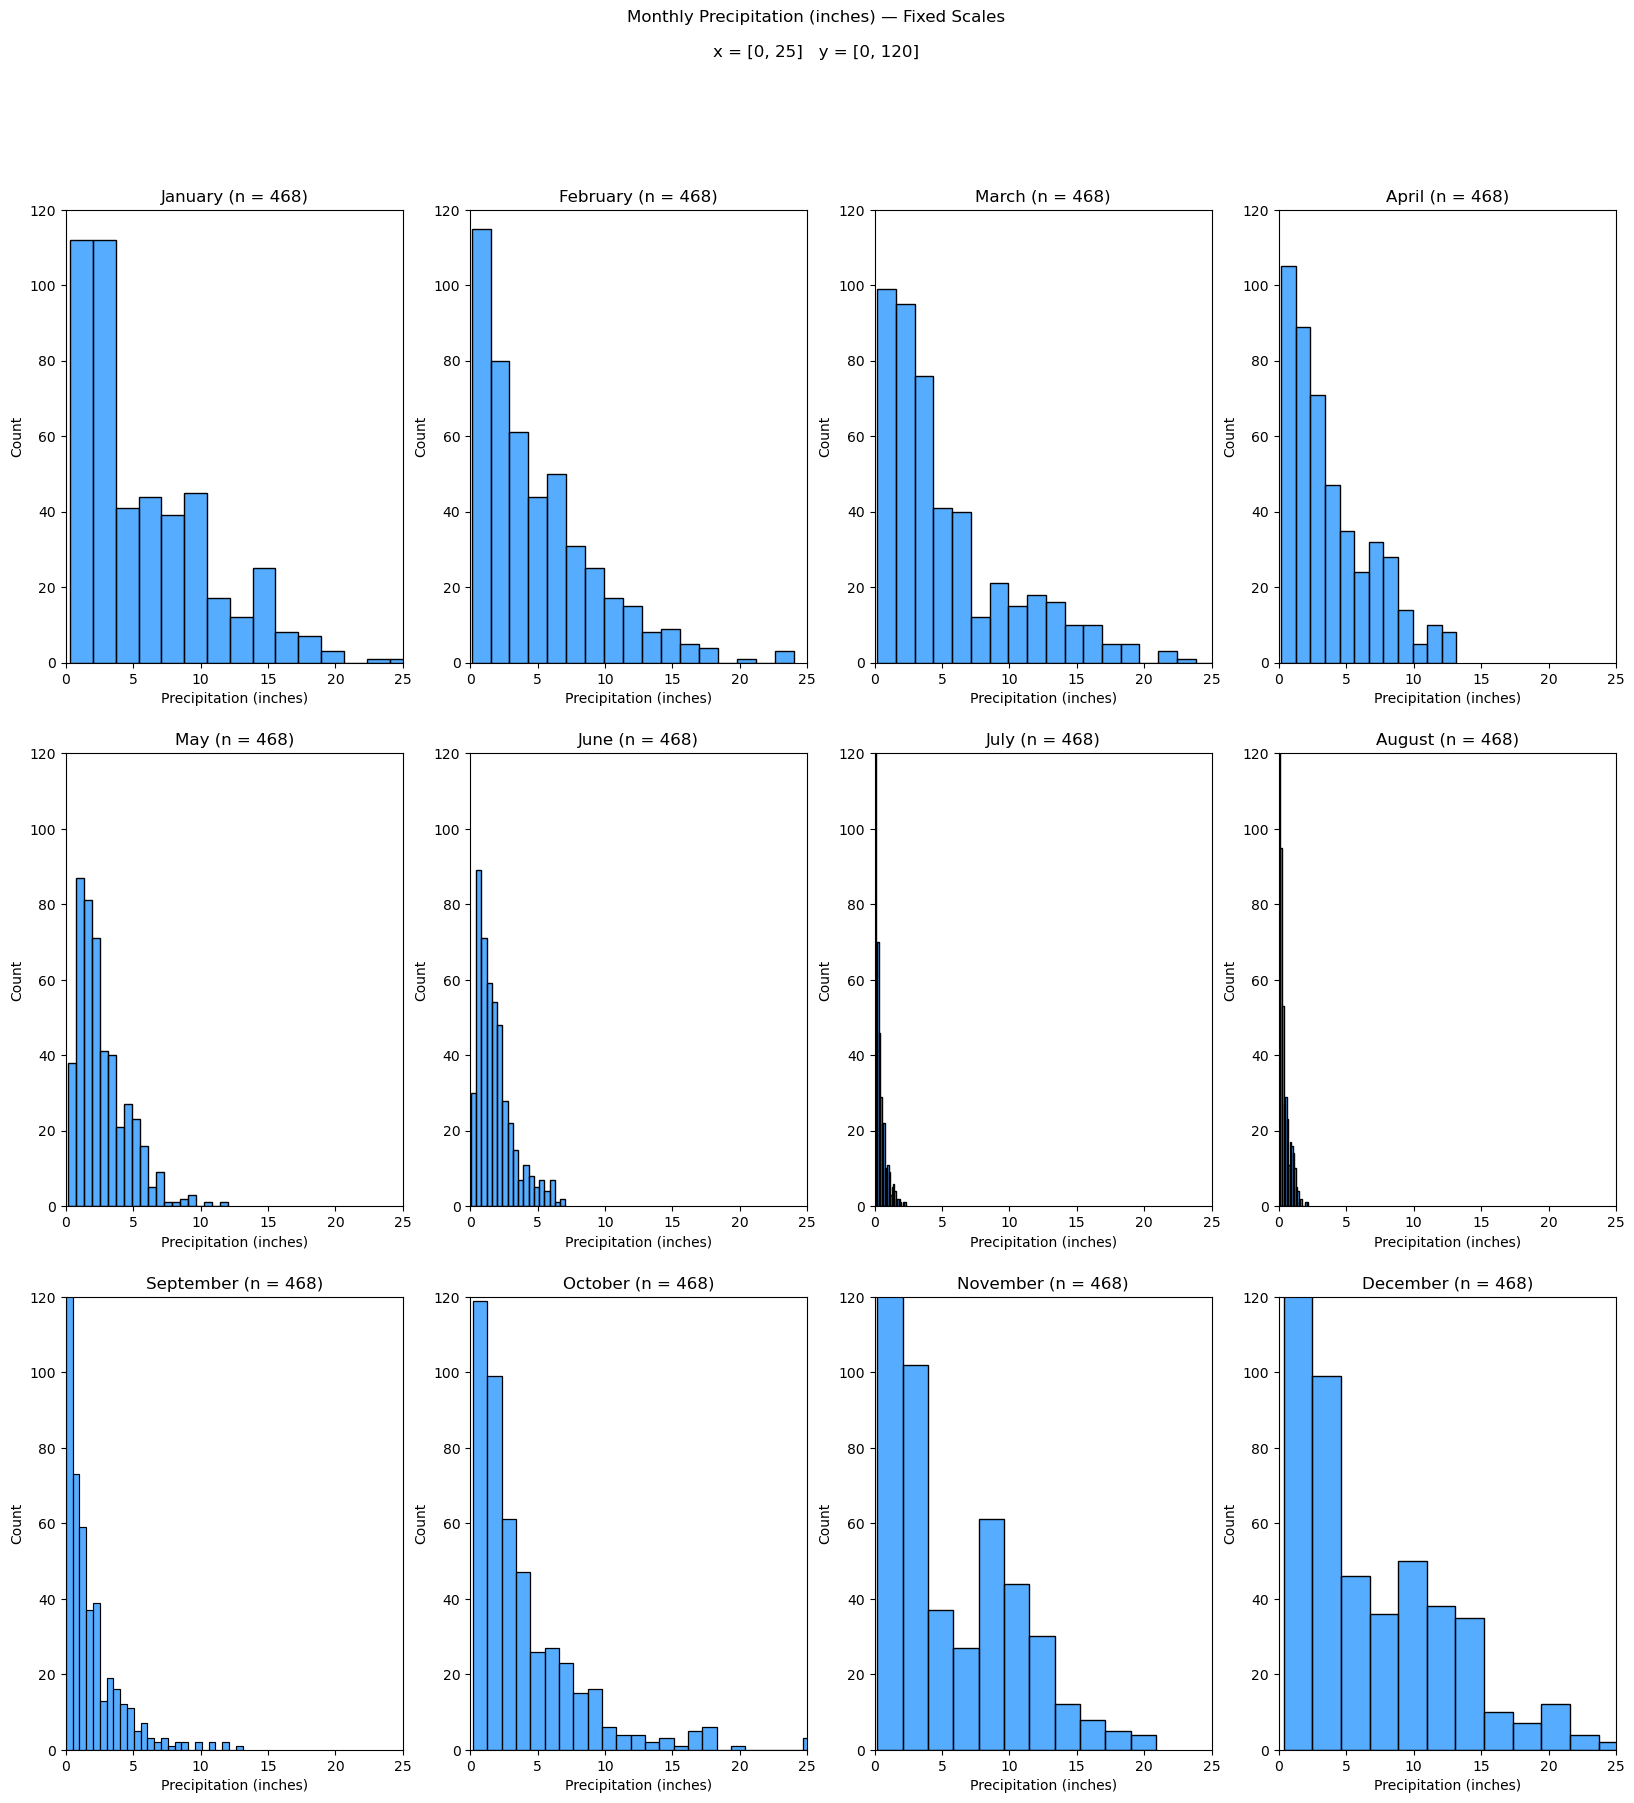

In [6]:
# Create master plot with subplots for each month of the year
plot_months_hist, ax_hist = plot.subplots(3, 4, figsize = (20, 20))
plot_months_hist.suptitle("Monthly Precipitation (inches) — Fixed Scales\n\nx = [0, 25]   y = [0, 120]")

j = k = 0
for i in range(1, 13):
  sns.histplot(ax = ax_hist[j][k], x = dict_precip_month[i], color = "dodgerblue")
  ax_hist[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_precip_month[i])))
  ax_hist[j][k].set_xlabel("Precipitation (inches)")
  ax_hist[j][k].set_xlim(0, 25)
  ax_hist[j][k].set_ylim(0, 120)

  k = i % 4
  j += 1 if k == 0 else 0

## Boxplot

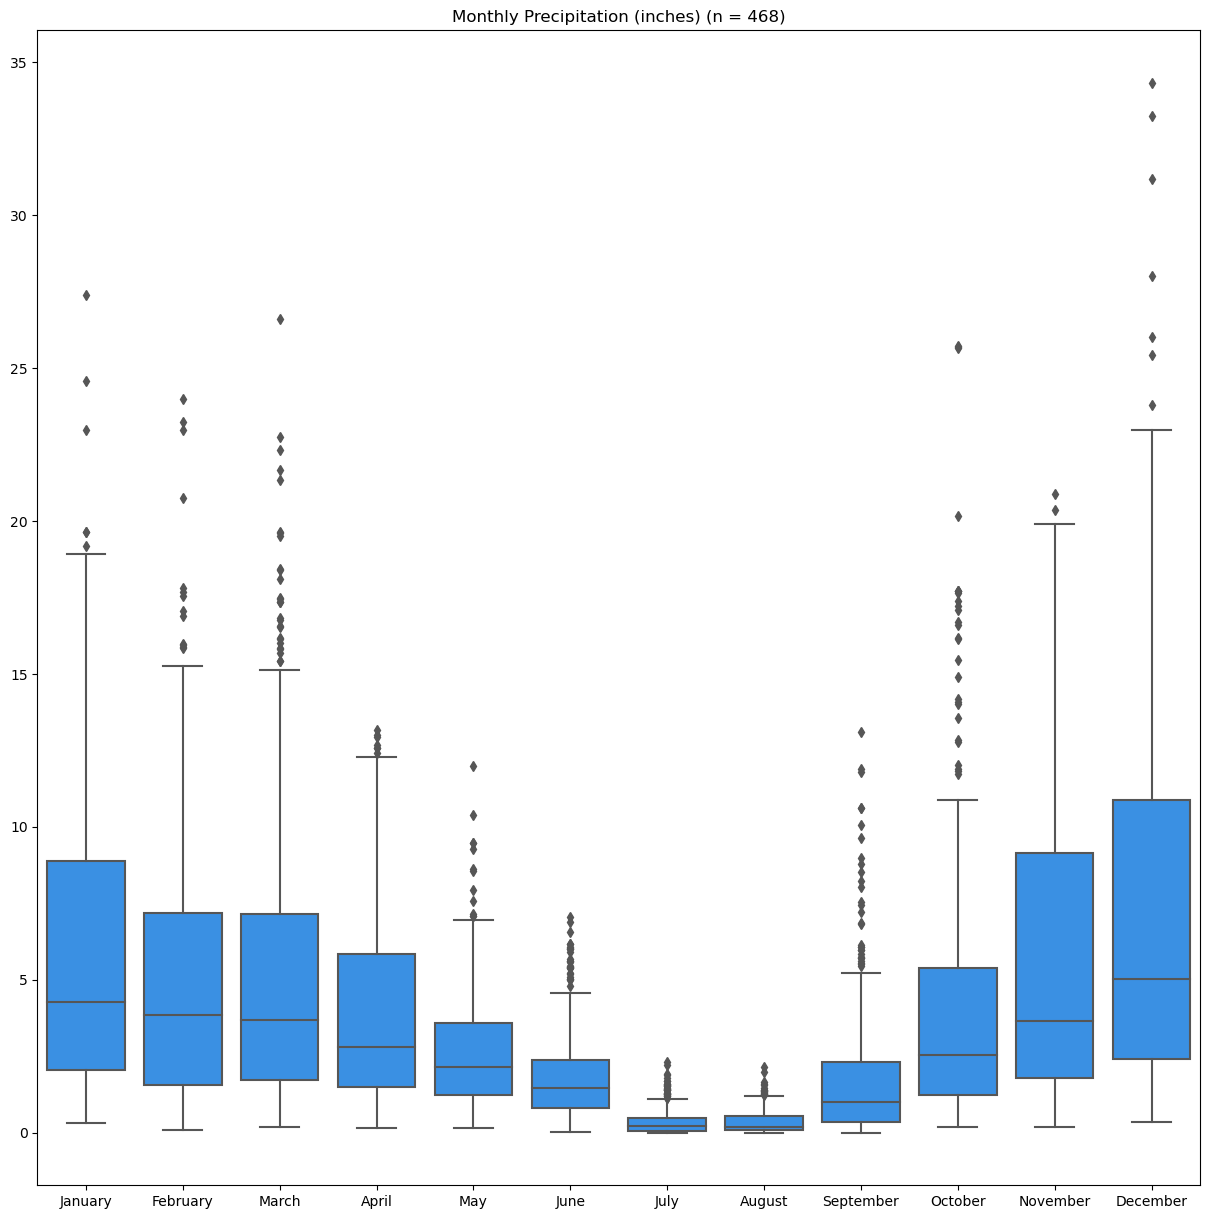

In [7]:
plot.figure(figsize = (15, 15))
ax = sns.boxplot(df_stats_precip, color = "dodgerblue")
ax.set_title("Monthly Precipitation (inches)" + " (n = {})".format(df_stats_precip["January"].count()));

# Temperature Data

In [8]:
dict_temp_month = {}

for i in range(1, 13):
  # Query dataset for rows matching the i'th month and retrieve the precipitation data
  # Collate within a matrix, flatten into a 1-D array, and add to the dictionary as a series
  dict_temp_month[i] = pd.Series(np.concatenate(np.array([df.query("Month == {}".format(i))["Temperature"].to_numpy() for df in dfs_temp_counties])))

## Statistics

In [9]:
# Calculate mean, median, and mode for each month
df_stats_temp = pd.DataFrame({ "Mean": [np.around(m.mean(), 3) for m in dict_temp_month.values()],
                               "Median": [np.around(m.median(), 3) for m in dict_temp_month.values()],
                               "Mode": [np.around(m.mode().iloc[0], 3) for m in dict_temp_month.values()] }).T
df_stats_temp.columns = const.month_list

df_stats_temp

,January,February,March,April,May,June,July,August,September,October,November,December
Mean,36.778,37.296,41.587,45.848,52.519,59.223,66.621,66.863,60.247,50.613,40.65,34.718
Median,37.050,37.900,41.800,46.400,53.000,59.100,66.400,66.900,60.400,51.000,40.90,34.700
Mode,34.800,39.000,41.600,48.900,55.300,61.400,64.800,66.000,60.200,51.300,37.90,39.200


In [10]:
df_stats_temp = pd.DataFrame([m.to_list() for m in dict_temp_month.values()]).T
df_stats_temp.columns = const.month_list

df_stats_temp.describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
January,468.0,36.777991,5.780133,19.4,22.335,26.005,32.975,37.05,41.6,44.865,47.400,49.7
February,468.0,37.296368,5.424100,23.7,25.567,28.105,33.100,37.90,41.2,46.330,48.300,50.2
March,468.0,41.586538,3.895439,31.6,33.867,34.970,38.800,41.80,44.1,47.995,50.533,51.6
April,468.0,45.848291,3.937702,35.3,36.167,38.970,43.000,46.40,48.9,51.665,54.333,55.0
May,468.0,52.519444,3.674361,42.0,43.300,45.235,50.000,53.00,55.4,57.665,59.033,61.2
June,468.0,59.222863,3.779497,51.3,51.600,53.535,56.600,59.10,61.4,66.265,69.866,70.7
July,468.0,66.621368,3.687831,57.6,59.267,60.900,64.000,66.40,69.3,72.965,75.133,77.7
August,468.0,66.862821,2.806521,60.0,60.701,62.700,64.800,66.90,68.7,71.565,73.666,75.2
September,468.0,60.247009,3.025355,52.4,53.500,54.735,58.300,60.40,62.5,65.030,65.700,66.6
October,468.0,50.612607,4.244587,37.3,40.134,43.470,47.775,51.00,53.2,57.700,58.900,60.1


## Histogram

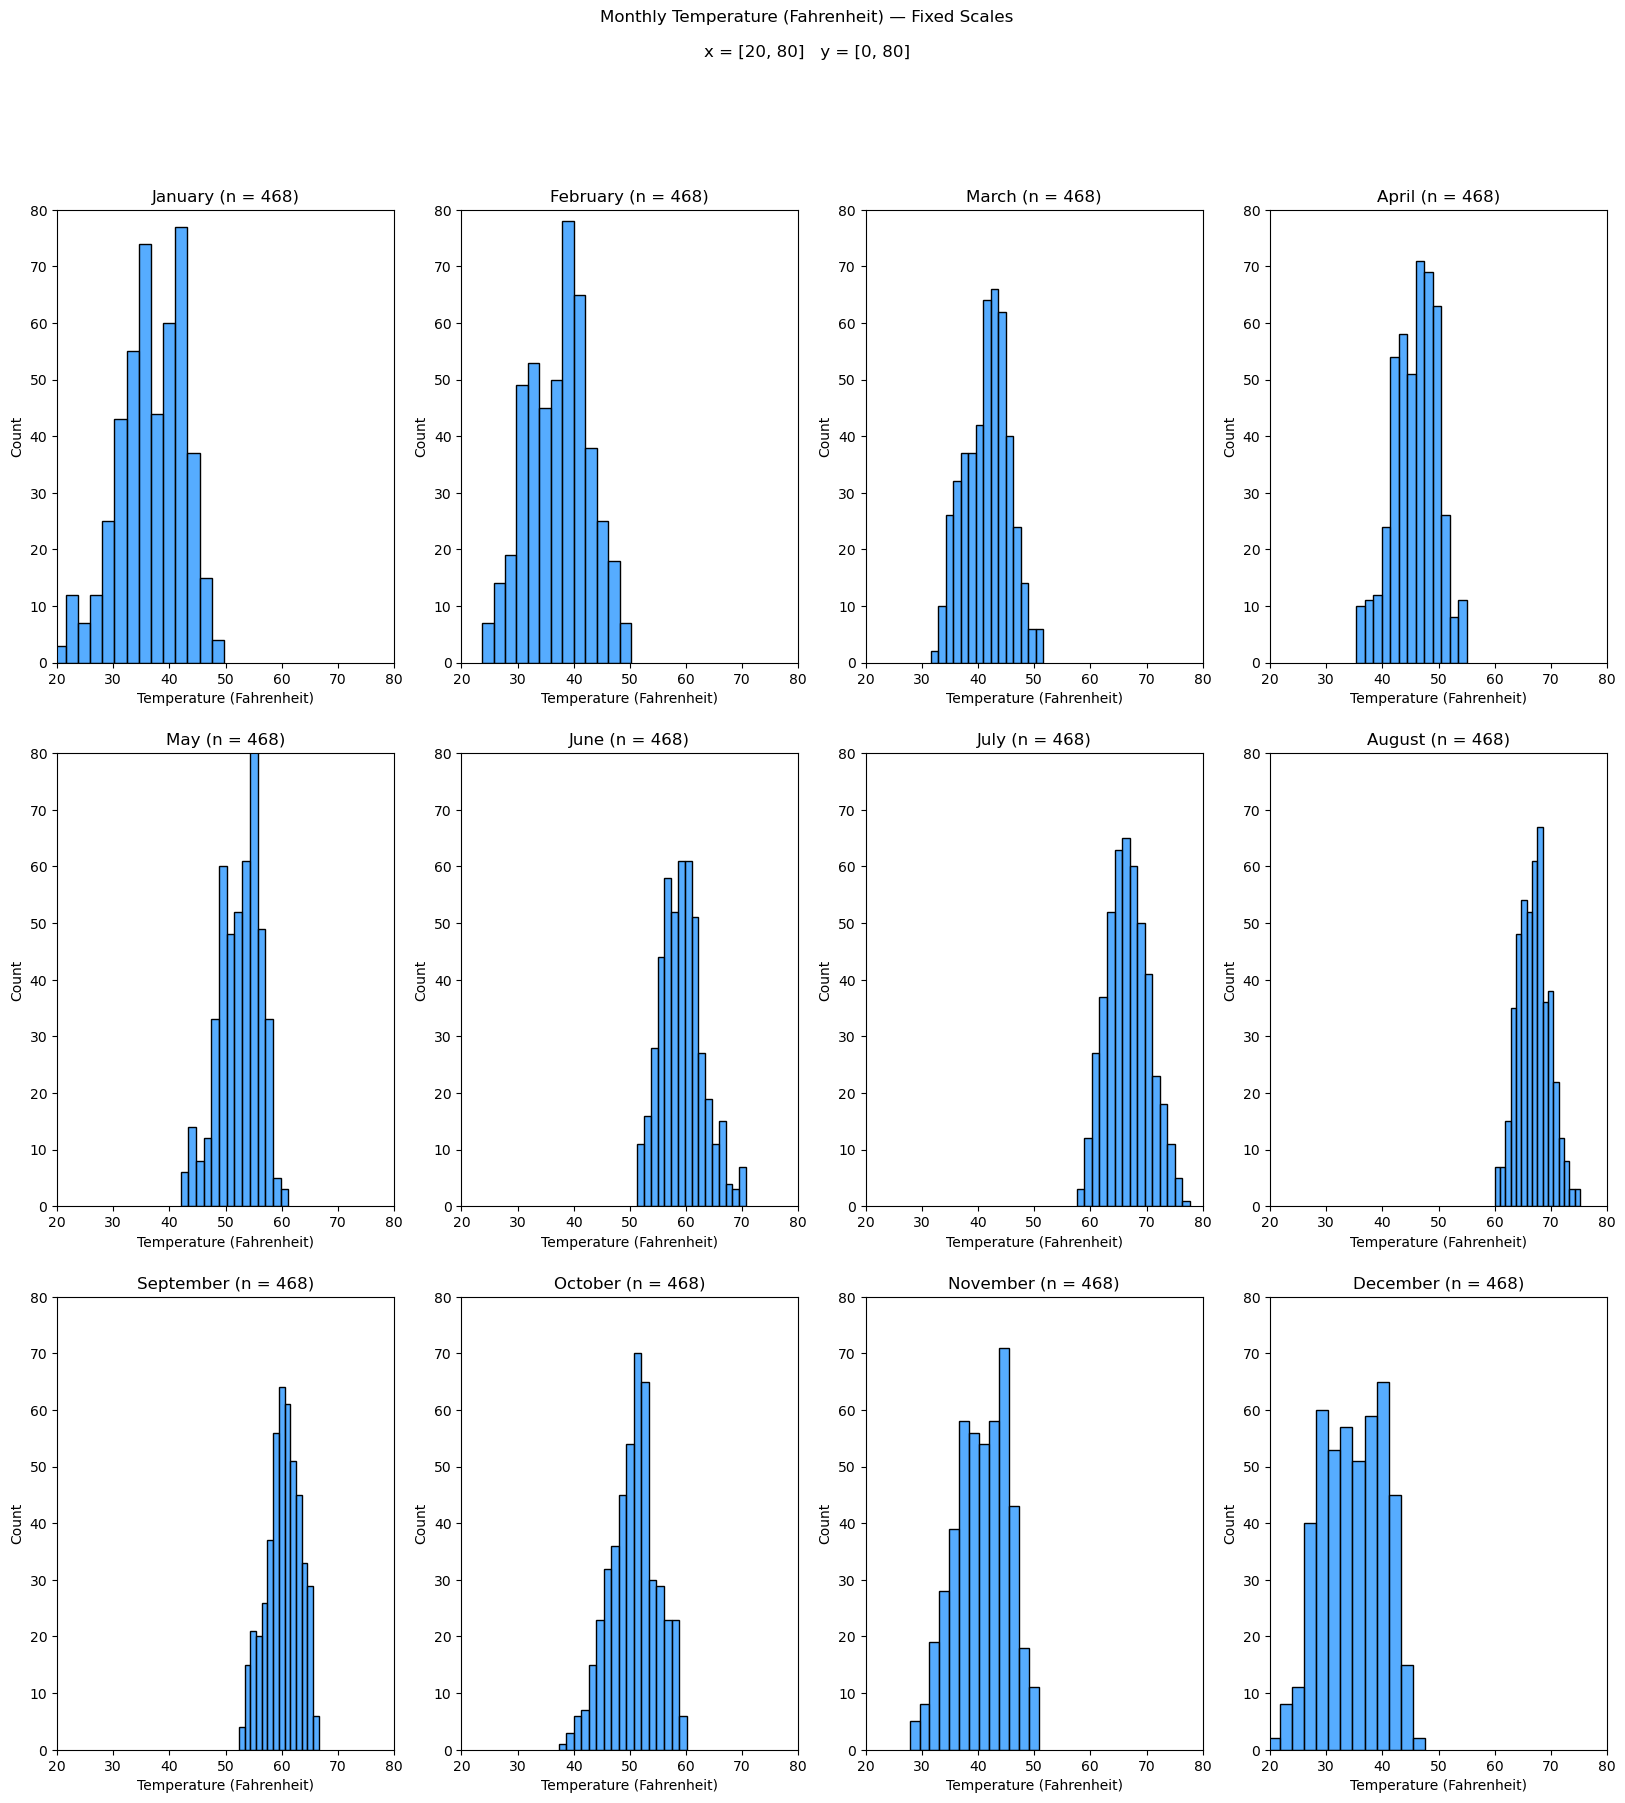

In [11]:
# Create master plot with subplots for each month of the year
plot_months_hist, ax_hist = plot.subplots(3, 4, figsize = (20, 20))
plot_months_hist.suptitle("Monthly Temperature (Fahrenheit) — Fixed Scales\n\nx = [20, 80]   y = [0, 80]")

j = k = 0
for i in range(1, 13):
  sns.histplot(ax = ax_hist[j][k], x = dict_temp_month[i], color = "dodgerblue")
  ax_hist[j][k].set_title(const.month_list[i - 1] + " (n = {})".format(len(dict_temp_month[i])))
  ax_hist[j][k].set_xlabel("Temperature (Fahrenheit)")
  ax_hist[j][k].set_xlim(20, 80)
  ax_hist[j][k].set_ylim(0, 80)

  k = i % 4
  j += 1 if k == 0 else 0

## Boxplot

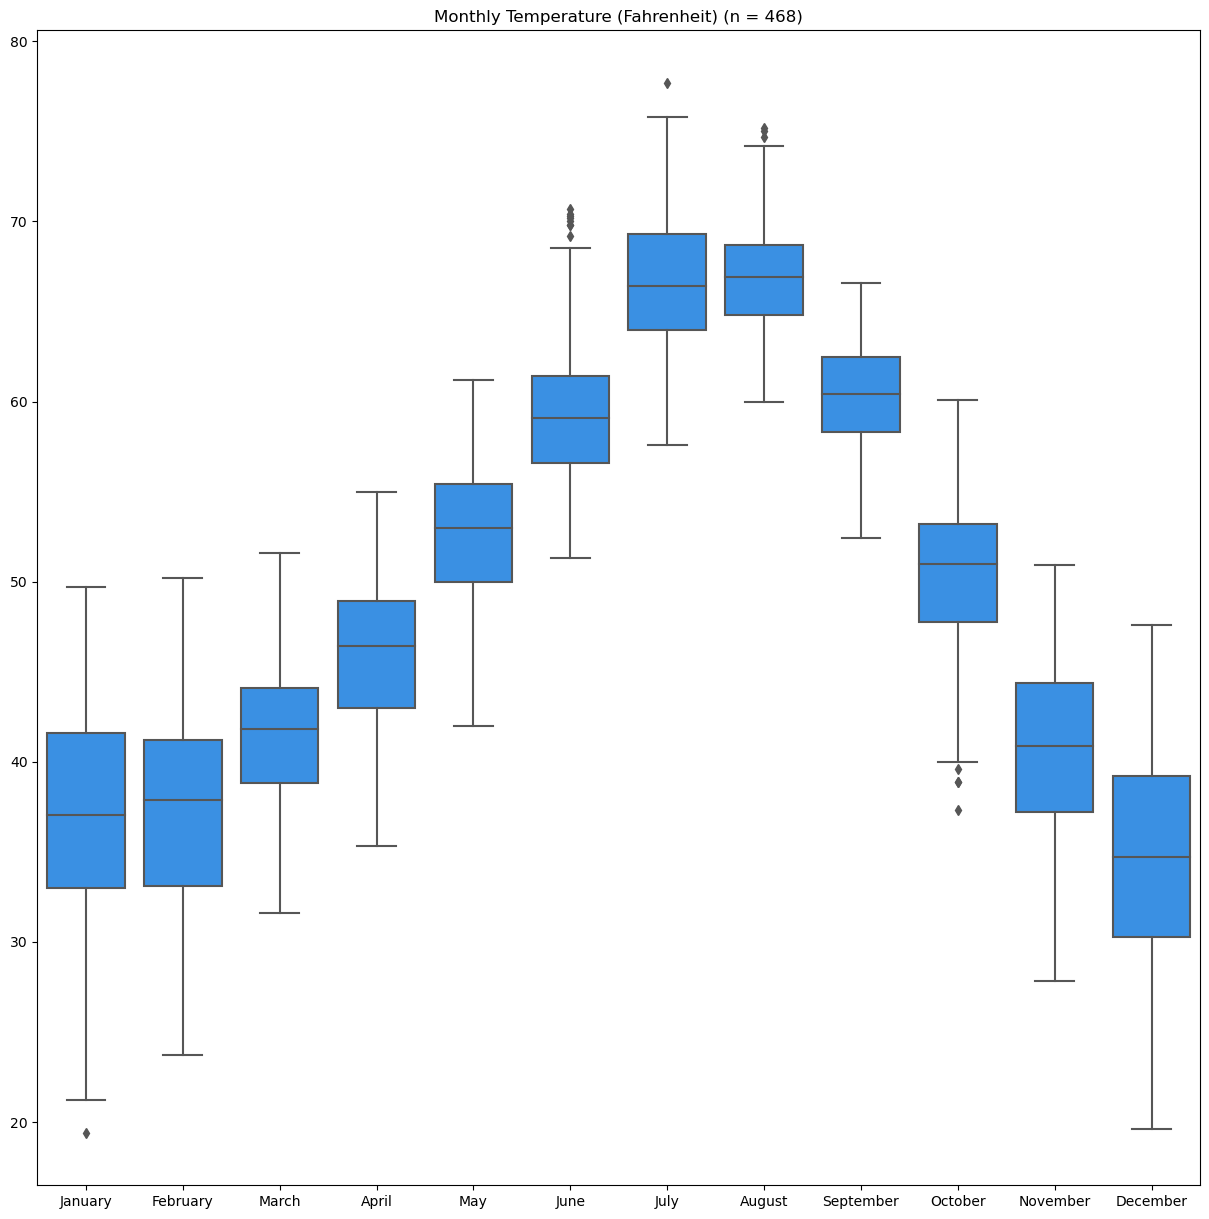

In [12]:
plot.figure(figsize = (15, 15))
ax = sns.boxplot(df_stats_temp, color = "dodgerblue")
ax.set_title("Monthly Temperature (Fahrenheit)" + " (n = {})".format(df_stats_temp["January"].count()));

# Wildfire Occurrence

[Placeholder]

## Statistics

In [13]:
df = pd.DataFrame({ "Mean": df_wildfire["Month"].mean(),
                    "Median": df_wildfire["Month"].median(),
                    "Mode": df_wildfire["Month"].mode() }).T
df.columns = ["Month"]

df

,Month
Mean,7.413071
Median,8.000000
Mode,8.000000


## Histogram

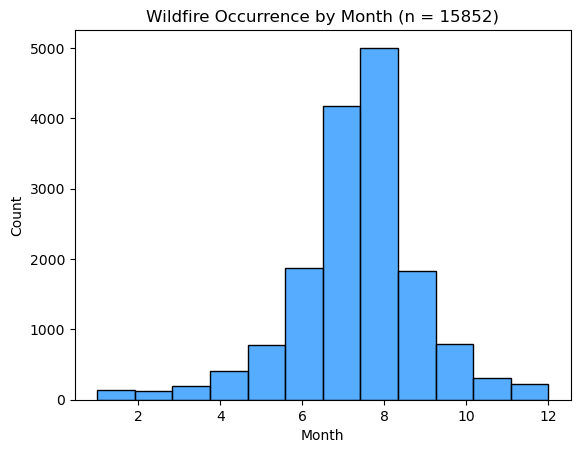

In [14]:
plot_month_hist = sns.histplot(x = df_wildfire["Month"], bins = 12, color = "dodgerblue")
plot_month_hist.set_title("Wildfire Occurrence by Month (n = {})".format(df_wildfire["Month"].count()));

## Boxplot

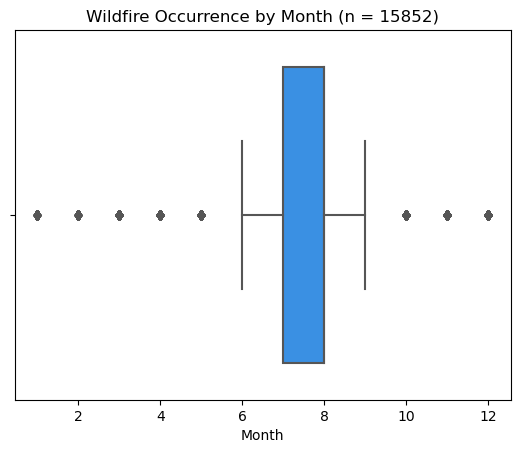

In [15]:
plot_month_boxplot = sns.boxplot(x = df_wildfire["Month"], color = "dodgerblue")
plot_month_boxplot.set_title("Wildfire Occurrence by Month (n = {})".format(df_wildfire["Month"].count()));